In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
from gensim import corpora

D:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
2017-05-18 08:16:12,332 : INFO : 'pattern' package not found; tag filters are not available for English


In [5]:
default_columns = ['Id','Name','Vintage','Vineyard.Name','Varietal.Name','Notes']

In [6]:
reds = pd.read_json('red_wines.json', orient = "columns", typ='frame')
reds[['Id','Name','Vintage','Vineyard.Name','Varietal.Name','Notes']].sort_index()

,Id,Name,Vintage,Vineyard.Name,Varietal.Name,Notes
0,97450,Chateau Latour 2005,2005,Château Latour,Bordeaux Red Blends,Winemaker's Notes: The 2005 vintage demonstra...
1,167260,Hall Eighteen Seventy-Three Cabernet Sauvignon...,2013,Hall,Cabernet Sauvignon,Winemaker's Notes: #47 Wine Spectator Top 100...
2,140027,Casanova di Neri Brunello di Montalcino Tenuta...,2010,Casanova di Nieri,Sangiovese,Winemaker's Notes: Sourced from the vineyards...
3,167338,Louis Martini Alexander Valley Cabernet Sauvig...,2014,Louis Martini,Cabernet Sauvignon,Winemaker's Notes: The 2014 Alexander Valley ...
4,154233,Caymus Special Selection Cabernet Sauvignon 2013,2013,Caymus,Cabernet Sauvignon,Winemaker's Notes: #44 Wine Spectator Top 100...
5,178047,Ascheri Barolo 2012,2012,Ascheri,Nebbiolo,Winemaker's Notes: Intense garnet red color. ...
6,158817,Caymus Napa Valley Cabernet Sauvignon 2014,2014,Caymus,Cabernet Sauvignon,Winemaker's Notes: The 2014 growing season wa...
7,168198,Silver Oak Napa Valley Cabernet Sauvignon 2012,2012,Silver Oak Napa Valley,Cabernet Sauvignon,Winemaker's Notes: Our 2012 Napa Valley Caber...
8,137441,Stag's Leap Wine Cellars Artemis Cabernet Sauv...,2013,Stag's Leap Wine Cellars,Cabernet Sauvignon,Winemaker's Notes: This Artemis Cabernet Sauv...
9,169747,Fontodi Flaccianello 2013,2013,Fontodi,Sangiovese,Winemaker's Notes: Flaccianello combines all ...


In [7]:
whts = pd.read_json('white_wines.json',orient = 'columns', typ='frame')
whts[['Id','Name','Vintage','Vineyard.Name','Varietal.Name','Notes']].sort_index()

,Id,Name,Vintage,Vineyard.Name,Varietal.Name,Notes
0,161023,Rombauer Chardonnay 2015,2015,Rombauer Vineyards,Chardonnay,Winemaker's Notes: Enticing aromas of ripe ap...
1,167254,Louis Latour Corton-Charlemagne Grand Cru 2014,2014,Louis Latour,Chardonnay,Winemaker's Notes: #100 Wine Spectator Top 10...
2,154926,Shafer Red Shoulder Ranch Chardonnay 2014,2014,Shafer Vineyards,Chardonnay,Winemaker's Notes: The picture-perfect 2014 v...
3,165382,Carneros Hills Winery Chardenet Durell Vineyar...,2013,Carneros Hills Winery,Chardonnay,Winemaker's Notes: The famed Durell Vineyard ...
4,161757,Leeuwin Estate Art Series Chardonnay 2013,2013,Leeuwin Estate,Chardonnay,Winemaker's Notes: A concentrated and vibrant...
5,152290,Dog Point Vineyard Sauvignon Blanc 2015,2015,Dog Point Vineyard,Sauvignon Blanc,Winemaker's Notes: Dog Point Vineyard Sauvign...
6,156857,KONO Sauvignon Blanc 2015,2015,KONO,Sauvignon Blanc,Winemaker's Notes: #41 Wine Spectator Top 100...
7,163012,Forrest Estate Sauvignon Blanc 2015,2015,Forrest Estate,Sauvignon Blanc,"Winemaker's Notes: Vibrant, punchy nose of Gu..."
8,164023,Kendall-Jackson Vintner's Reserve Chardonnay 2015,2015,Kendall-Jackson,Chardonnay,Winemaker's Notes: Beautifully integrated tro...
9,152881,La Crema Sonoma Coast Chardonnay 2014,2014,La Crema,Chardonnay,Winemaker's Notes: This wine opens with layer...


In [8]:
rose = pd.read_json('rose_wines.json', orient='columns', typ='frame')
rose[['Id','Name','Vintage','Vineyard.Name','Varietal.Name','Notes']].sort_index()

,Id,Name,Vintage,Vineyard.Name,Varietal.Name,Notes
0,176064,Miraval Rose 2016,2016,Chateau Miraval,Rosé,"Winemaker's Notes: Beautiful, pale, petal-pin..."
1,168108,Chateau d'Esclans Whispering Angel Rose 2016,2016,Chateau d'Esclans,Rosé,Winemaker's Notes: An irresistible pink! Char...
2,160121,Chateau D'Aqueria Tavel Rose 2015,2015,Chateau D'Aqueria,Rosé,"Winemaker's Notes: Slightly lighter in color,..."
3,167948,Curran Grenache Rose 2016,2016,Curran,Rosé,"Winemaker's Notes: Rose Quartz in color, this..."
4,159450,Sables d'Azur Rose 2015,2015,Sables d'Azur,Rosé,Winemaker's Notes: Pale rose peach colored. A...
5,161864,Domaines Ott Chateau de Selle Cotes de Provenc...,2015,Domaines Ott,Rosé,Winemaker's Notes: Pale pink robe with saffro...
6,177622,Wolffer Estate Rose 2016,2016,Wolffer Estate,Rosé,Winemaker's Notes: Light copper-salmon in col...
7,159397,Carol Shelton Rendezvous Rose 2015,2015,Carol Shelton,Rosé,"Winemaker's Notes: Light cranberry color, jui..."
8,156068,Minuty M Rose 2015,2015,Minuty,Rosé,Winemaker's Notes: Light and bright in color....
9,205007,Miraval Rose (3 Liter Bottle) 2016,2016,Chateau Miraval,Rosé,"Winemaker's Notes: Beautiful, pale, petal-pin..."


In [9]:
#combine data_sets (wine type is in 'Varietal.WineType.Id' and 'Varietal.WineType.Name')
wine = pd.DataFrame()
wine = wine.append(reds, ignore_index = True)
wine = wine.append(whts, ignore_index = True)
wine = wine.append(rose, ignore_index = True)

In [10]:
wine.columns

Index(['Appellation.Id', 'Appellation.Name', 'Appellation.Region.Area',
       'Appellation.Region.Id', 'Appellation.Region.Name',
       'Appellation.Region.Url', 'Appellation.Url',
       'Community.Reviews.HighestScore', 'Community.Reviews.List',
       'Community.Reviews.Url', 'Community.Url', 'Description',
       'GeoLocation.Latitude', 'GeoLocation.Longitude', 'GeoLocation.Url',
       'Id', 'Labels', 'Name', 'Notes', 'PriceMax', 'PriceMin', 'PriceRetail',
       'ProductAttributes', 'Ratings.HighestScore', 'Ratings.List', 'Retail',
       'Type', 'Url', 'Varietal.Id', 'Varietal.Name', 'Varietal.Url',
       'Varietal.WineType.Id', 'Varietal.WineType.Name',
       'Varietal.WineType.Url', 'Vineyard.GeoLocation.Latitude',
       'Vineyard.GeoLocation.Longitude', 'Vineyard.GeoLocation.Url',
       'Vineyard.Id', 'Vineyard.ImageUrl', 'Vineyard.Name', 'Vineyard.Url',
       'Vintage', 'Vintages.List'],
      dtype='object')

In [11]:
#first-level value counts: reds vs whites
wine['Varietal.WineType.Name'].value_counts()

Red Wines      72576
White Wines    33479
Rosé Wine       2201
                   3
Name: Varietal.WineType.Name, dtype: int64

In [12]:
#clean step #1: wines without winetypes
wine[wine['Varietal.WineType.Name'] == ""][default_columns]

,Id,Name,Vintage,Vineyard.Name,Varietal.Name,Notes
55035,62605,Borgo Scopeto Chianti Classico 2000,2000,Borgo Scopeto,,"Winemaker's Notes: A powerful, full-bodied wi..."
76401,83794,Maryhill Viognier 2003,2003,Maryhill Winery,,NaN
98081,83805,Maryhill Viognier 2004,2004,Maryhill Winery,,NaN


In [14]:
#first-level value counts: varietal types
wine['Varietal.Name'].value_counts().sort_index()

                             3
Albarino                   373
Barbera                    619
Bordeaux Red Blends       7737
Bordeaux White Blends      589
Cabernet Franc             508
Cabernet Sauvignon       13374
Carmenere                  356
Chardonnay               13619
Chenin Blanc               709
Dolcetto                   224
Gamay                      635
Gewurztraminer             524
Grenache                   789
Gruner Veltliner           289
Malbec                    1732
Merlot                    4903
Mourvedre                  278
Muscat                     487
Nebbiolo                  1839
Nero d'Avola               208
Other Red Blends          6949
Other Red Wine            1685
Other White Blends        2329
Other White Wine          1744
Petite Sirah               562
Pinot Blanc                468
Pinot Gris/Grigio         2368
Pinot Noir               11037
Pinotage                   171
Primitivo                  139
Rhone Red Blends          3341
Rhone Wh

In [15]:
#Clean step #2: the wines without varietal types
#default_columns = ['Id','Name','Vintage','Vineyard.Name','Varietal.Name','Notes']
#default_columns + ['Varietal.Type.Name']
wine[wine['Varietal.Name'] == ""][default_columns + ['Varietal.WineType.Name']]


,Id,Name,Vintage,Vineyard.Name,Varietal.Name,Notes,Varietal.WineType.Name
55035,62605,Borgo Scopeto Chianti Classico 2000,2000,Borgo Scopeto,,"Winemaker's Notes: A powerful, full-bodied wi...",
76401,83794,Maryhill Viognier 2003,2003,Maryhill Winery,,NaN,
98081,83805,Maryhill Viognier 2004,2004,Maryhill Winery,,NaN,


In [17]:
#"chianti" is not a varietal, so check the varietal name of other chianti
wine[wine.Name.str.contains('Chianti')][default_columns]

,Id,Name,Vintage,Vineyard.Name,Varietal.Name,Notes
106,84974,Bootleg Chianti 2004,2004,Bootleg,Sangiovese,"Winemaker's Notes: Spicy, medium-bodied Chian..."
132,146712,Podere Il Palazzino Chianti Classico Argenina ...,2011,Podere Il Palazzino,Sangiovese,Winemaker's Notes: Chianti Classico Argenina ...
194,75121,Badia a Coltibuono Cetamura Chianti 2002,2002,Badia a Coltibuono,Sangiovese,Winemaker's Notes: Ruby red in color with a b...
198,16137,Banfi Estate Bottled Flask Chianti (half-bottl...,1998,Castello Banfi,Sangiovese,"Winemaker's Notes: Lively, dry, zesty and fru..."
230,85099,Gabbiano Chianti 2004,2004,Castello di Gabbiano,Sangiovese,Winemaker's Notes: Gabbiano Chianti DOCG is p...
246,140142,Tenuta di Nozzole Villa Nozzole Chianti Classi...,2012,Tenuta di Nozzole,Sangiovese,"Winemaker's Notes: Shows ripe, crushed red ch..."
262,144982,Toscolo Chianti 2014,2014,Toscolo,Sangiovese,Winemaker's Notes: Toscolo Chianti is a brill...
321,130905,Podere Il Palazzino Chianti Classico Argenina ...,2009,Podere Il Palazzino,Sangiovese,Winemaker's Notes: The 2009 Argenina displays...
322,156580,Tenuta di Arceno Chianti Classico Riserva 2012,2012,Tenuta di Arceno,Sangiovese,Winemaker's Notes: This vintage is characteri...
330,115976,Poggiotondo Chianti Cerro del Masso 2009,2009,Poggiotondo,Sangiovese,Winemaker's Notes: This modern rendition of c...


In [ ]:
#just fill empty in by hand for the time being?
#varietal.name

#varietal.name.type

In [18]:
#to fill in, use the index list from wine['Varietal.Name'].value_counts().sort_index()
varietal_index = wine['Varietal.Name'].value_counts().sort_index(ascending = False).index
#wine[wine.Name.str.contains('Chianti')]['Varietal.Name'].value_counts()
for i in range(0,len(wine)):
    
    if wine['Varietal.Name'][i] == '':
        wine_name = wine['Name'][i]
        print(wine_name)

Borgo Scopeto Chianti Classico 2000
Maryhill Viognier 2003
Maryhill Viognier 2004


In [19]:
#remove 'Futures Pre-Sale' items
#probably won't have tasting notes anyway
wine[wine.Name.str.contains('Futures')][['Id','Name','Notes']]

,Id,Name,Notes
384,131450,Peter Lehmann Futures Shiraz 2010,Winemaker's Notes: This wine has a deep rich ...
736,142778,Chateau Angelus (Futures Pre-Sale) 2014,"Winemaker's Notes: Blend: 50% Cabernet Franc,..."
1525,157623,Chateau Brane-Cantenac (Futures Pre-Sale) 2015,NaN
1658,153460,Chateau Mouton Rothschild (Futures Pre-Sale) 2015,"Winemaker's Notes: Rich, deeply colored, well..."
2127,149569,Chateau Mouton Rothschild Le Petit Mouton (1.5...,NaN
3191,153205,Tour Saint Christophe (Futures Pre-Sale) 2015,NaN
3803,153208,Chateau Labegorce (Futures Pre-Sale) 2015,Winemaker's Notes: The nouveau grand Labegorc...
3980,142875,Chateau Lafleur-Gazin (Futures Pre-Sale) 2014,Winemaker's Notes: Chateau Lafleur-Gazin has ...
4892,158991,Chateau Cos d'Estournel (1.5 Liter Futures Pre...,Winemaker's Notes: The rigor of the selection...
4906,164162,Chateau Margaux (1.5 Liter Magnum Futures Pre-...,NaN


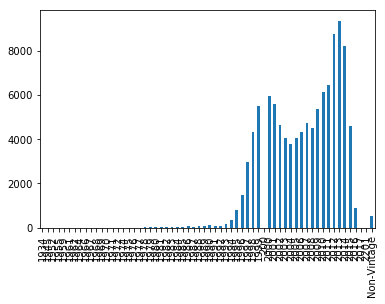

In [20]:
#check vintage values
#rd.date.dt.month.value_counts().sort_index().plot(kind='bar')

wine['Vintage'].value_counts().sort_index().plot(kind='bar')

In [21]:
wine[wine.Vintage == 'Non-Vintage'][['Id','Name','Vintage','Vineyard.Name','Varietal.Name','Notes']].sort_values(by='Id')

,Id,Name,Vintage,Vineyard.Name,Varietal.Name,Notes
78106,1156,Bridgeview Blue Moon Riesling,Non-Vintage,Bridgeview Vineyard & Winery,Riesling,Winemaker's Notes: Slightly sweet showing app...
102315,1648,Sokol Blosser Evolution White Blend,Non-Vintage,Sokol Blosser,Other White Blends,Winemaker's Notes: We shortened the name to E...
48125,3584,Peachy Canyon Incredible Red Bin 106,Non-Vintage,Peachy Canyon,Other Red Blends,"Winemaker's Notes: Rich, ruby color. Very con..."
73827,4058,Kendall-Jackson Muscat Vintner's Reserve,Non-Vintage,Kendall-Jackson,Muscat,Winemaker's Notes:
87239,4073,Stonestreet Pinnacle Sauvignon Blanc,Non-Vintage,Stonestreet,Sauvignon Blanc,Winemaker's Notes:
52655,5448,Edmeades *,Non-Vintage,Edmeades,Pinot Noir,NaN
77498,6614,Bonny Doon Ca' del Solo il Pescatore,Non-Vintage,Bonny Doon,Other White Blends,Winemaker's Notes: The first term that comes ...
103480,7356,Frey NSA Organic Natural White,Non-Vintage,Frey,Other White Blends,"Winemaker's Notes: A delicate, soft and flowe..."
10267,7581,Peachy Canyon Incredible Red Bin 107,Non-Vintage,Peachy Canyon,Other Red Blends,"Winemaker's Notes: Rich, ruby color. Very con..."
4660,8125,Peachy Canyon Incredible Red Bin 108,Non-Vintage,Peachy Canyon,Other Red Blends,"Winemaker's Notes: Rich, ruby color. Very con..."


In [22]:
wine[wine.Vintage == '200'][['Id','Name','Vintage','Vineyard.Name','Varietal.Name','Notes']]

,Id,Name,Vintage,Vineyard.Name,Varietal.Name,Notes
29479,45262,Au Bon Climat Santa Barbara Pinot Noir,200,Au Bon Climat,Pinot Noir,NaN


In [23]:
wine[wine.Vintage == '2201'][['Id','Name','Vintage','Vineyard.Name','Varietal.Name','Notes']]

,Id,Name,Vintage,Vineyard.Name,Varietal.Name,Notes
24684,80272,Fetzer Reserve Pinot Noir 2201,2201,Fetzer,Pinot Noir,Winemaker's Notes: The famed Bien Nacido Vine...


In [98]:
#testing gensim on the first 13 tasting notes
wine[wine['Varietal.Name']=='Cabernet Sauvignon'][['Id','Name','Notes']].head(100)

,Id,Name,Notes
1,167260,Hall Eighteen Seventy-Three Cabernet Sauvignon...,Winemaker's Notes: #47 Wine Spectator Top 100...
3,153741,Stag's Leap Wine Cellars Artemis Cabernet Sauv...,Winemaker's Notes: Artemis Cabernet Sauvignon...
5,137352,Swanson Instant Napa Cabernet Sauvignon 2010,Winemaker's Notes: The color is a deep violet...
6,96233,Folie a Deux Cabernet Sauvignon 2006,Winemaker's Notes: The 2006 Napa Valley Caber...
8,50431,Blackstone Cabernet Sauvignon (half-bottle) 1998,Winemaker's Notes: This wonderful Cabernet ha...
16,178628,Elsa Bianchi Cabernet Sauvignon 2015,Winemaker's Notes: Elsa Bianchi Cabernet Sauv...
32,167540,Cliff Lede Poetry Stags Leap District Cabernet...,"Winemaker's Notes: This luxurious, exacting w..."
35,127497,Gordon Brothers Cabernet Sauvignon 2010,Winemaker's Notes: Black cherry and cranberry...
56,83086,Hardys Stamp Cabernet Sauvignon 2003,Winemaker's Notes: Deep red with purple overt...
59,135129,Plungerhead Lodi Cabernet Sauvignon 2012,Winemaker's Notes: The 2012 Lodi Cabernet Sau...


In [83]:
test_notes = wine[wine['Varietal.Name']=='Cabernet Sauvignon']['Notes'].head(100).copy().tolist()
test_ids = wine['Id'].head(100).copy().tolist()
print(test_notes)
print(test_ids)

['Winemaker\'s Notes:  #47 Wine Spectator Top 100 of 2016 The 2013 Eighteen Seventy-Three Cabernet Sauvignon has a dark garnet color, masculine in character with brooding aromas of sweet tobacco, anise, black currant, clove and cedar. Flavors of dark cherry, black olive and juniper berry, combine with dense, structured tannins to power this earth-driven wine through the finish.In 1873, Captain William Peterson came to Napa and established a pioneering winery on the Hall\'s St. Helena property. Throughout the 1930\'s and 40\'s, the site grew to become Napa\'s most important winery, producing nearly 40% of its entire vintage. The fruit for our "Eighteen Seventy-Three" hails from the rugged mountain slopes that frame Napa Valley. Power and individuality underscore this wine, a deliberate intent to commemorate the trailblazing spirit of Napa\'s first vintners.', "Winemaker's Notes:  Artemis Cabernet Sauvignon opens with intriguing plum, ripe figand allspice aromas. On the palate, the wine 

In [86]:
stoplist = set('winemaker\'s notes: for a an and to in of the'.split())
passlist = ('cranberry','cherry', 'raspberry', 'strawberry', 'currant')
texts = [[word for word in note.lower().split() if word not in stoplist]
         for note in test_notes]

taste = [[word.strip('.,:') for word in note.lower().split() if word.startswith(tuple([key[:5] for key in passlist]))]
         for note in test_notes]

#from pprint import pprint
pprint(texts)
pprint(taste)

[['#47',
  'wine',
  'spectator',
  'top',
  '100',
  '2016',
  '2013',
  'eighteen',
  'seventy-three',
  'cabernet',
  'sauvignon',
  'has',
  'dark',
  'garnet',
  'color,',
  'masculine',
  'character',
  'with',
  'brooding',
  'aromas',
  'sweet',
  'tobacco,',
  'anise,',
  'black',
  'currant,',
  'clove',
  'cedar.',
  'flavors',
  'dark',
  'cherry,',
  'black',
  'olive',
  'juniper',
  'berry,',
  'combine',
  'with',
  'dense,',
  'structured',
  'tannins',
  'power',
  'this',
  'earth-driven',
  'wine',
  'through',
  'finish.in',
  '1873,',
  'captain',
  'william',
  'peterson',
  'came',
  'napa',
  'established',
  'pioneering',
  'winery',
  'on',
  "hall's",
  'st.',
  'helena',
  'property.',
  'throughout',
  "1930's",
  "40's,",
  'site',
  'grew',
  'become',
  "napa's",
  'most',
  'important',
  'winery,',
  'producing',
  'nearly',
  '40%',
  'its',
  'entire',
  'vintage.',
  'fruit',
  'our',
  '"eighteen',
  'seventy-three"',
  'hails',
  'from',
  'rugge

In [87]:
tuple([key[:5] for key in red_fruit])

('red', 'sour', 'cranb', 'plum', 'pomeg', 'cherr', 'straw', 'raspb')

In [96]:
black_fruit = (
    'black',
    'boysenberry',
    'currant',
    'cherry',
    'plum',
    'blackberry',
    'blueberry',
    'olive')
red_fruit = (
    'red','sour',
    'cranberrry',
    'plum',
    'pomegranate',
    'cherry',
    'strawberry',
    'raspberry')
dried_fruit = (
    'dried',
    'raisin',
    'fig',
    'date',
    'fruitcake')
spice = (
    'spice',
    'white',
    'pepper',
    'cinnamon',
    'anise',
    'fennel',
    'eucalyptus',
    'mint',
    'thyme')
vegetable = (
    'green','sun-dried',
    'grass',
    'tomato',
    'gooseberry',
    'bell',
    'jalapeno',
    'almond',
    'tea')
earth_notes = (
    'earth',
    'clay',
    'slate',
    'gravel',
    'soil',
    'beet',
    'rock',
    'volcanic',
    'ash',
    'petroleum')
microbial = (
    'butter',
    'cream',
    'sourdough',
    'lager',
    'truffle',
    'mushroom')
oak_aging = (
    #'oak',
    'vanilla',
    'coconut',
    'baking',
    'cigar',
    'smoke',
    'dill')
general_aging = (
    'nuts',
    'tobacco',
    'coffee',
    'cocoa',
    'leather')
flowers = (
    'iris',
    'peony',
    'elderflower',
    'acacia',
    'lilac',
    'jasmine',
    'honeysuckle',
    'violet',
    'lavender',
    'rose',
    'potpourri',
    'hibiscus')
citrus = (
    'citrus',
    'lime',
    'lemon',
    'grapefruit',
    'orange',
    'marmalade')
tree_fruit = (
    'tree',
    'quince',
    'apple',
    'pear',
    'nectarine',
    'peach',
    'apricot',
    'persimmon')
tropical_fruit = (
    'tropical',
    'pineapple',
    'mango',
    'guava',
    'kiwi',
    'lychee',
    'bubblegum')

flavors = [black_fruit, 
           red_fruit, 
           dried_fruit, 
           spice, 
           vegetable, 
           earth_notes, 
           microbial,
           oak_aging,
           general_aging,
           flowers,
           citrus,
           tree_fruit,
           tropical_fruit]

In [97]:
stoplist = set('winemaker\'s notes: for a an and to in of the'.split())
passlist = oak_aging + general_aging
texts = [[word for word in note.lower().split() if word not in stoplist]
         for note in test_notes]

taste = [[word.strip('.,:') for word in note.lower().split() if word.startswith(tuple([key[:6] for key in passlist]))]
         for note in test_notes]

pprint(taste)

[['tobacco'],
 [],
 [],
 [],
 [],
 ['vanilla', 'vanilla'],
 ['cocoa'],
 ['vanilla'],
 [],
 ['dill', 'vanilla'],
 [],
 ['tobacco', 'coffee'],
 [],
 [],
 ['leather'],
 [],
 [],
 [],
 ['vanilla'],
 [],
 [],
 [],
 ['tobacco'],
 ['cigar', 'vanilla', 'smoke."-wine'],
 [],
 ['baking'],
 ['vanilla', 'smoke'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['tobacco'],
 [],
 [],
 [],
 ['vanilla'],
 [],
 [],
 [],
 [],
 ['vanilla'],
 ['vanilla', 'coffee'],
 ['coffee'],
 ['vanilla'],
 ['vanilla'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['cocoa'],
 ['cocoa', 'vanilla'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['smoke', 'leather'],
 [],
 [],
 ['leather', 'coffee'],
 [],
 ['vanilla', 'tobacco'],
 [],
 [],
 ['cigar'],
 [],
 [],
 ['vanilla'],
 ['vanilla', 'leather', 'tobacco'],
 [],
 [],
 ['baking'],
 ['coffee', 'cocoa'],
 [],
 ['vanilla', 'tobacco', 'vanilla'],
 ['coffee'],
 [],
 [],
 [],
 [],
 [],
 ['vanilla'],
 [],
 ['smoke', 'vanilla'],
 ['vanilla'],
 ['tobacco'],
 ['tobacco'],
 [],
 [],
 [],
 ['vanilla'],
 ['tobacco'],
 ['ci

In [ ]:
#overall plan:
#find the major flavor components, i.e. fruit, herbs
#then go back and find descriptors associated with these flavors, i.e. black, sour
#also determine, if possible, if these flavors were associated with the aroma, i.e. nose, or taste
